#### This notebook is to perform Multiple Linear Regression

In [10]:
data = read.csv('../data/mapping_sleep_alpha.txt', stringsAsFactors=FALSE, sep='\t')
data$Age_78 = data$Age - min(data$Age)

In [11]:
head(data)

X.SampleID,BarcodeSequence,LinkerPrimerSequence,Experiment_Design_Description,Library_Construction_Protocol,Linker,Platform,Center_Name,Center_Project,Instrument_Model,⋯,M1BENZO,AMAMPT_C1,AMFVT_C1,AMPHIT_15SD,Description,alpha_pd,observed_otus,shannon,pielou_e,Age_78
BI0023,TCTGGTGACATT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,Missing:not collected,Missing:not collected,Missing:not collected,Orwoll.BI0023.BI,27.77117,302,5.727116,0.6951729,5
BI0056,CAAGCATGCCTA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,1.0,1.0,0.0,Orwoll.BI0056.BI,17.93266,173,3.888281,0.5229960,3
BI0131,CTATTTGCGACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,1.0,1.0,0.0,Orwoll.BI0131.BI,21.45366,223,4.050730,0.5192645,5
BI0153,ATCGGCGTTACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,1.0,1.0,-1.0,Orwoll.BI0153.BI,18.46968,223,4.894253,0.6273959,1
BI0215,CCTCTCGTGATC,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,1.0,0.0,-1.0,Orwoll.BI0215.BI,20.04983,222,5.295055,0.6793396,3
BI0353,TGCCATCTGAAT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,1.0,1.0,0.0,Orwoll.BI0353.BI,13.75183,155,4.213016,0.5790192,2


In [12]:
names(data)

[1] "X.SampleID"                    "BarcodeSequence"              
 [3] "LinkerPrimerSequence"          "Experiment_Design_Description"
 [5] "Library_Construction_Protocol" "Linker"                       
 [7] "Platform"                      "Center_Name"                  
 [9] "Center_Project"                "Instrument_Model"             
[11] "Title"                         "Anonymized_Name"              
[13] "Scientific_Name"               "Taxon_ID"                     
[15] "Sample_Type"                   "Geo_Loc_Name"                 
[17] "Elevation"                     "Env_Biome"                    
[19] "Env_Feature"                   "Env_Material"                 
[21] "Env_Package"                   "Latitude"                     
[23] "Longitude"                     "Collection_Timestamp"         
[25] "DNA_Extracted"                 "Physical_Specimen_Location"   
[27] "Physical_Specimen_Remaining"   "Age"                          
[29] "Age_Units"                     "Host_Subject_ID"              
[31] "Host_Taxid"                    "Host_Scientific_Name"         
[33] "Host_Common_Name"              "Life_Stage"                   
[35] "Sex"                           "Height"                       
[37] "Height_Units"                  "Weight"                       
[39] "Weight_Units"                  "BMI"                          
[41] "Body_Habitat"                  "Body_Site"                    
[43] "Body_Product"                  "GIERACE"                      
[45] "SITE"                          "AMAMPT"                       
[47] "AMPHIT"                        "AMFVT"                        
[49] "MIDATA"                        "V4DATE"                       
[51] "GIMSTAT"                       "MHDIAB"                       
[53] "MHRHEU1"                       "MHOA"                         
[55] "MHCHF"                         "MHMI"                         
[57] "MHDEPR"                        "MHDEPRT"                      
[59] "TUDRAMT_REVISED"               "PQPSLMED"                     
[61] "PQPSQUAL"                      "PASCORE"                      
[63] "QLCOMP"                        "SLSLPHRS"                     
[65] "SLEEPHRS"                      "PQPEFFCY"                     
[67] "PQPEFFIC"                      "PQPSQI"                       
[69] "PQBADSLP"                      "TURSMOKE"                     
[71] "M1ADEPR"                       "M1BENZO"                      
[73] "AMAMPT_C1"                     "AMFVT_C1"                     
[75] "AMPHIT_15SD"                   "Description"                  
[77] "alpha_pd"                      "observed_otus"                
[79] "shannon"                       "pielou_e"                     
[81] "Age_78"

In [13]:
# convert categorial to factors
vars_cat = c('GIERACE', 'SITE', 'SLEEPHRS', 'AMPHIT_15SD', 'MHDIAB', 'MHRHEU1', 'MHOA', 'MHCHF', 'MHMI', 'MHDEPR', 'GIMSTAT',
             'MHDEPRT', 'TUDRAMT_REVISED', 'PQPSQUAL', 'QLCOMP', 'PQBADSLP', 'TURSMOKE', 'M1ADEPR', 'M1BENZO', 
             'AMAMPT_C1', 'AMFVT_C1', 'PQPSLMED', 'PQPEFFIC', 'MIDATA', 'V4DATE')
data[vars_cat] = lapply(data[vars_cat], factor)

# convert continuous to numeric
vars_cts = c('Age', 'BMI', 'PASCORE', 'AMAMPT', 'SLSLPHRS',
             'AMPHIT', 'AMFVT',  'PQPSQI', 'PQPEFFCY', 'alpha_pd')
data[vars_cts] = lapply(data[vars_cts], as.numeric)

Warning message in lapply(data[vars_cts], as.numeric):
“NAs introduced by coercion”Warning message in lapply(data[vars_cts], as.numeric):
“NAs introduced by coercion”Warning message in lapply(data[vars_cts], as.numeric):
“NAs introduced by coercion”Warning message in lapply(data[vars_cts], as.numeric):
“NAs introduced by coercion”Warning message in lapply(data[vars_cts], as.numeric):
“NAs introduced by coercion”

In [14]:
summary(data[vars_cts])

      Age             BMI           PASCORE           AMAMPT      
 Min.   :78.00   Min.   :17.60   Min.   :  0.00   Min.   : 36.99  
 1st Qu.:81.00   1st Qu.:24.51   1st Qu.: 70.14   1st Qu.:128.59  
 Median :83.00   Median :26.72   Median :116.75   Median :159.28  
 Mean   :84.24   Mean   :27.01   Mean   :122.48   Mean   :176.33  
 3rd Qu.:87.00   3rd Qu.:28.98   3rd Qu.:165.79   3rd Qu.:201.25  
 Max.   :98.00   Max.   :42.93   Max.   :359.14   Max.   :642.65  
                                                  NA's   :181     
    SLSLPHRS          AMPHIT           AMFVT            PQPSQI      
 Min.   : 3.000   Min.   : 8.773   Min.   : 161.0   Min.   : 0.000  
 1st Qu.: 6.000   1st Qu.:12.231   1st Qu.: 637.2   1st Qu.: 3.000  
 Median : 7.000   Median :13.101   Median : 871.6   Median : 5.000  
 Mean   : 6.882   Mean   :13.147   Mean   : 960.5   Mean   : 5.306  
 3rd Qu.: 8.000   3rd Qu.:14.011   3rd Qu.:1169.2   3rd Qu.: 7.000  
 Max.   :10.000   Max.   :22.501   Max.   :4363.1 

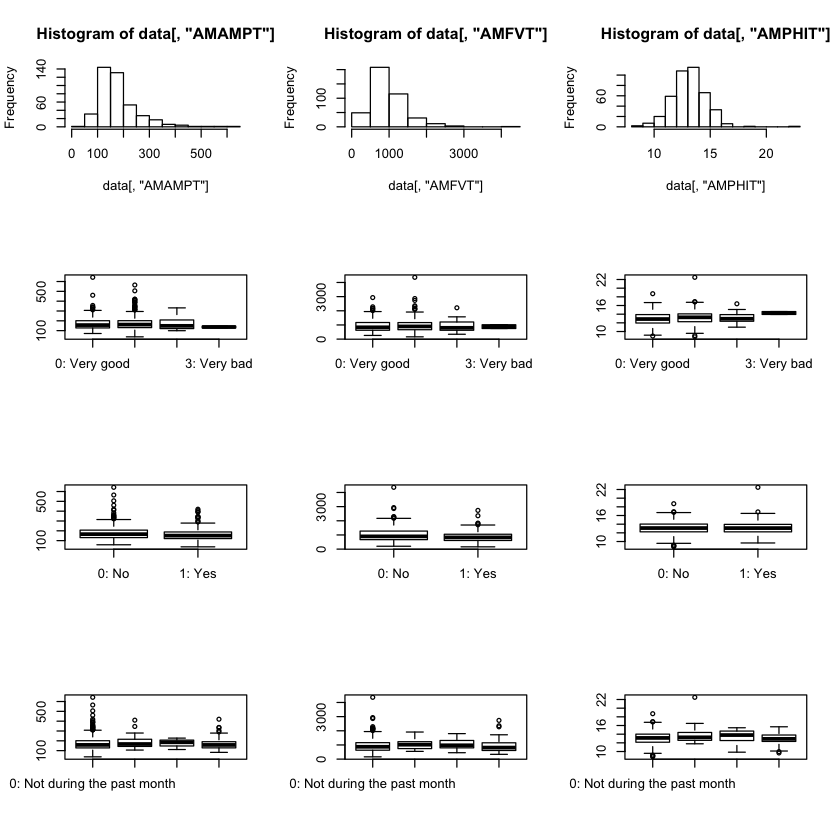

In [25]:
par(mfrow=c(4,3))
hist(data[, 'AMAMPT'])
hist(data[, 'AMFVT'])
hist(data[, 'AMPHIT'])
boxplot(AMAMPT ~ PQPSQUAL, data=data)
boxplot(AMFVT ~ PQPSQUAL, data=data)
boxplot(AMPHIT ~ PQPSQUAL, data=data)

boxplot(AMAMPT ~ PQBADSLP , data=data)
boxplot(AMFVT ~ PQBADSLP , data=data)
boxplot(AMPHIT ~ PQBADSLP , data=data)

boxplot(AMAMPT ~ PQPSLMED , data=data)
boxplot(AMFVT ~ PQPSLMED , data=data)
boxplot(AMPHIT ~ PQPSLMED , data=data)

In [16]:
summary(data[vars_cat])

               GIERACE             SITE                      SLEEPHRS  
 1:WHITE           :520   Birmingham : 75   1: <=6 HRS           :153  
 2:AFRICAN AMERICAN: 24   Minneapolis: 91   2: 7 HRS             :143  
 3:ASIAN           : 34   Palo Alto  : 86   3:>=8 HRS            :128  
 4:HISPANIC        : 12   Pittsburgh : 92   Missing:not collected:175  
 5:OTHER           :  9   Portland   :121                              
                          San Diego  :134                              
                                                                       
                AMPHIT_15SD     MHDIAB      MHRHEU1        MHOA    
 -1.0                 : 28   0: No :508   0: No :552   0: No :450  
 0.0                  :371   1: Yes: 91   1: Yes: 47   1: Yes:149  
 1.0                  : 19                                         
 Missing:not collected:181                                         
                                                                   
                

In [7]:
# change reference level
data$SITE = relevel(data$SITE, ref='San Diego')
data$TUDRAMT_REVISED  = relevel(data$TUDRAMT, ref='0:None drinker')
data$QLCOMP = relevel(data$QLCOMP, ref='1:GOOD/EXCELLENT')
data$AMPHIT_15SD = relevel(data$AMPHIT_15SD, ref='0.0')

In [8]:
attach(data)

## stepwise backwards selection, with p-value threshold 0.2

In [9]:
library(car)
Anova(lm(alpha_pd ~ Age_78 + BMI + PASCORE + GIERACE + SITE + GIMSTAT + MHDIAB + MHRHEU1 + MHOA + 
         MHCHF + MHMI + MHDEPR + TUDRAMT_REVISED + PQPSLMED + PQPSQUAL + QLCOMP + 
         TURSMOKE + M1ADEPR + M1BENZO + PQPEFFIC ))

,Sum Sq,Df,F value,Pr(>F)
Age_78,38.280860,1,1.01160337,0.314957327
BMI,138.892430,1,3.67034727,0.055902107
PASCORE,59.286144,1,1.56668535,0.211216313
GIERACE,449.318352,4,2.96840221,0.019150281
SITE,361.912665,5,1.91276826,0.090440345
GIMSTAT,178.415748,3,1.57159453,0.195204360
MHDIAB,394.628708,1,10.42838981,0.001314298
MHRHEU1,27.794681,1,0.73449743,0.391799171
MHOA,4.311558,1,0.11393650,0.735833865
MHCHF,31.699021,1,0.83767284,0.360460664


In [10]:
# drop MHDEPR
Anova(lm(alpha_pd ~ Age_78 + BMI + PASCORE + GIERACE + SITE + GIMSTAT + MHDIAB + MHRHEU1 + MHOA + 
         MHCHF + MHMI + TUDRAMT_REVISED + PQPSLMED + PQPSQUAL + QLCOMP + 
         TURSMOKE + M1ADEPR + M1BENZO + PQPEFFIC ))

,Sum Sq,Df,F value,Pr(>F)
Age_78,38.086872,1,1.00824113,0.315761367
BMI,139.190824,1,3.68467943,0.055425971
PASCORE,59.157849,1,1.56603506,0.211310013
GIERACE,449.021045,4,2.97163736,0.019045171
SITE,361.980851,5,1.91648179,0.089824050
GIMSTAT,177.645772,3,1.56755477,0.196196875
MHDIAB,394.548226,1,10.44453714,0.001302937
MHRHEU1,27.593774,1,0.73046633,0.393100183
MHOA,4.305535,1,0.11397673,0.735788746
MHCHF,31.063096,1,0.82230672,0.364899423


In [11]:
# drop QLCOMP
Anova(lm(alpha_pd ~ Age_78 + BMI + PASCORE + GIERACE + SITE + GIMSTAT + MHDIAB + MHRHEU1 + MHOA + 
         MHCHF + MHMI + TUDRAMT_REVISED + PQPSLMED + PQPSQUAL +  
         TURSMOKE + M1ADEPR + M1BENZO + PQPEFFIC ))

,Sum Sq,Df,F value,Pr(>F)
Age_78,39.465202,1,1.0464864,0.3067617673
BMI,139.050150,1,3.6871493,0.0553435942
PASCORE,65.725026,1,1.7428100,0.1873254273
GIERACE,449.502562,4,2.9798297,0.0187837754
SITE,366.000834,5,1.9410259,0.0858653511
GIMSTAT,179.152145,3,1.5835071,0.1922935441
MHDIAB,413.395006,1,10.9618660,0.0009902701
MHRHEU1,28.088132,1,0.7448042,0.3884976850
MHOA,4.673723,1,0.1239317,0.7249419567
MHCHF,29.719332,1,0.7880582,0.3750710828


In [12]:
# drop PQPSLMED
Anova(lm(alpha_pd ~ Age_78 + BMI + PASCORE + GIERACE + SITE + GIMSTAT + MHDIAB + MHRHEU1 + MHOA + 
         MHCHF + MHMI + TUDRAMT_REVISED + PQPSQUAL + TURSMOKE + M1ADEPR + M1BENZO + PQPEFFIC ))

,Sum Sq,Df,F value,Pr(>F)
Age_78,38.805084,1,1.0325444,0.3100006277
BMI,142.960770,1,3.8039691,0.0516297468
PASCORE,63.525971,1,1.6903297,0.1940923657
GIERACE,456.562488,4,3.0371087,0.0170567025
SITE,373.470530,5,1.9874968,0.0788064466
GIMSTAT,186.025248,3,1.6499498,0.1768074396
MHDIAB,419.026845,1,11.1496682,0.0008963524
MHRHEU1,28.651709,1,0.7623785,0.3829594496
MHOA,3.399457,1,0.0904544,0.7637118967
MHCHF,28.474337,1,0.7576589,0.3844351263


In [13]:
# drop MHOA
Anova(lm(alpha_pd ~ Age_78 + BMI + PASCORE + GIERACE + SITE + GIMSTAT + MHDIAB + MHRHEU1 + 
         MHCHF + MHMI + TUDRAMT_REVISED + PQPSQUAL + TURSMOKE + M1ADEPR + M1BENZO + PQPEFFIC ))

,Sum Sq,Df,F value,Pr(>F)
Age_78,40.46586,1,1.0784838,0.299484382
BMI,146.78731,1,3.9121303,0.048427684
PASCORE,64.29775,1,1.7136439,0.191049209
GIERACE,458.72649,4,3.0564593,0.016509016
SITE,381.72430,5,2.0347197,0.072195736
GIMSTAT,190.90748,3,1.6960024,0.166772443
MHDIAB,416.79746,1,11.1083577,0.000916035
MHRHEU1,30.05774,1,0.8010896,0.371151641
MHCHF,27.01335,1,0.7199515,0.396521716
MHMI,18.63991,1,0.4967850,0.481208680


In [14]:
# drop PQPEFFIC
Anova(lm(alpha_pd ~ Age_78 + BMI + PASCORE + GIERACE + SITE + GIMSTAT + MHDIAB + MHRHEU1 + 
         MHCHF + MHMI + TUDRAMT_REVISED + PQPSQUAL + TURSMOKE + M1ADEPR + M1BENZO))

,Sum Sq,Df,F value,Pr(>F)
Age_78,34.51268,1,0.9232443,0.3370355812
BMI,140.40112,1,3.7558521,0.0531208160
PASCORE,74.76678,1,2.0000764,0.1578420755
GIERACE,467.10255,4,3.1238499,0.0147316162
SITE,375.60165,5,2.0095342,0.0756400324
GIMSTAT,190.15097,3,1.6955680,0.1668552999
MHDIAB,446.70633,1,11.9497829,0.0005876409
MHRHEU1,28.87715,1,0.7724888,0.3798218504
MHCHF,24.72020,1,0.6612868,0.4164485458
MHMI,20.25133,1,0.5417406,0.4620177241


In [15]:
## drop M1BENZO
Anova(lm(alpha_pd ~ Age_78 + BMI + PASCORE + GIERACE + SITE + GIMSTAT + MHDIAB + MHRHEU1 + 
         MHCHF + MHMI + TUDRAMT_REVISED + PQPSQUAL + TURSMOKE + M1ADEPR))

,Sum Sq,Df,F value,Pr(>F)
Age_78,39.41149,1,1.0552692,0.3047354626
BMI,142.97141,1,3.8281561,0.0508896541
PASCORE,79.11156,1,2.1182656,0.1461056914
GIERACE,461.39109,4,3.0885147,0.0156348701
SITE,395.46556,5,2.1177716,0.0618020484
GIMSTAT,199.85663,3,1.7837655,0.1491127045
MHDIAB,446.33781,1,11.9509969,0.0005871919
MHRHEU1,31.82970,1,0.8522618,0.3563066382
MHCHF,26.55184,1,0.7109434,0.3994869701
MHMI,20.54890,1,0.5502108,0.4585392474


In [16]:
## drop TURSMOKE
Anova(lm(alpha_pd ~ Age_78 + BMI + PASCORE + GIERACE + SITE + GIMSTAT + MHDIAB + MHRHEU1 + 
         MHCHF + MHMI + TUDRAMT_REVISED + PQPSQUAL + M1ADEPR ))

,Sum Sq,Df,F value,Pr(>F)
Age_78,39.15136,1,1.0490018,0.3061723287
BMI,164.33689,1,4.4031592,0.0363126919
PASCORE,78.45065,1,2.1019670,0.1476607340
GIERACE,449.26697,4,3.0093578,0.0178584199
SITE,375.57873,5,2.0126132,0.0751970873
GIMSTAT,188.38917,3,1.6825346,0.1696311759
MHDIAB,436.60218,1,11.6980971,0.0006704908
MHRHEU1,41.63448,1,1.1155331,0.2913305503
MHCHF,29.54916,1,0.7917253,0.3739549739
MHMI,15.06118,1,0.4035416,0.5255212586


In [17]:
# drop MHMI
Anova(lm(alpha_pd ~ Age_78 + BMI + PASCORE + GIERACE + SITE + GIMSTAT + MHDIAB + MHRHEU1 + 
         MHCHF + TUDRAMT_REVISED + PQPSQUAL + M1ADEPR ))

,Sum Sq,Df,F value,Pr(>F)
Age_78,39.52548,1,1.060135,0.3036211083
BMI,165.79079,1,4.446768,0.0354030309
PASCORE,76.56707,1,2.053648,0.1523902133
GIERACE,454.69955,4,3.048938,0.0167071086
SITE,374.01353,5,2.006325,0.0760760799
GIMSTAT,185.73935,3,1.660606,0.1744137411
MHDIAB,436.54542,1,11.708829,0.0006666331
MHRHEU1,42.41108,1,1.137531,0.2866260980
MHCHF,40.57221,1,1.088210,0.2973104077
TUDRAMT_REVISED,247.83709,6,1.107896,0.3562178816


In [18]:
# drop TUDRAMT_REVISED
Anova(lm(alpha_pd ~ Age_78 + BMI + PASCORE + GIERACE + SITE + GIMSTAT + MHDIAB + MHRHEU1 + 
         MHCHF + PQPSQUAL + M1ADEPR ))

,Sum Sq,Df,F value,Pr(>F)
Age_78,39.86138,1,1.067944,0.3018439646
BMI,156.90838,1,4.203803,0.0407855065
PASCORE,88.40240,1,2.368428,0.1243607822
GIERACE,556.60976,4,3.728095,0.0052532387
SITE,401.41402,5,2.150893,0.0580408642
GIMSTAT,189.06408,3,1.688433,0.1683497059
MHDIAB,473.70592,1,12.691267,0.0003977786
MHRHEU1,57.01554,1,1.527529,0.2169874886
MHCHF,39.83513,1,1.067241,0.3020030834
PQPSQUAL,174.32526,3,1.556809,0.1988218848


In [19]:
# drop MHCHF
Anova(lm(alpha_pd ~ Age_78 + BMI + PASCORE + GIERACE + SITE + GIMSTAT + MHDIAB + MHRHEU1 + PQPSQUAL + M1ADEPR ))

,Sum Sq,Df,F value,Pr(>F)
Age_78,39.63474,1,1.061748,0.3032484997
BMI,151.15897,1,4.049296,0.0446539771
PASCORE,78.64327,1,2.106721,0.1471966889
GIERACE,569.70505,4,3.815361,0.0045198791
SITE,395.47230,5,2.118808,0.0616507478
GIMSTAT,183.61570,3,1.639586,0.1791041609
MHDIAB,452.45610,1,12.120541,0.0005364137
MHRHEU1,48.76215,1,1.306256,0.2535475740
PQPSQUAL,170.48314,3,1.522319,0.2076186244
M1ADEPR,332.91693,1,8.918287,0.0029431003


In [20]:
## drop Age_78
Anova(lm(alpha_pd ~ BMI + PASCORE + GIERACE + SITE + GIMSTAT + MHDIAB + MHRHEU1 + PQPSQUAL + M1ADEPR ))

,Sum Sq,Df,F value,Pr(>F)
BMI,182.04308,1,4.876108,0.0276227454
PASCORE,59.04377,1,1.581515,0.2090504759
GIERACE,591.44443,4,3.960528,0.0035174961
SITE,390.87297,5,2.093943,0.0645921802
GIMSTAT,183.32772,3,1.636839,0.1797255625
MHDIAB,470.41233,1,12.600213,0.0004170803
MHRHEU1,47.55406,1,1.273758,0.2595311523
PQPSQUAL,181.20467,3,1.617884,0.1840855436
M1ADEPR,330.90282,1,8.863386,0.0030313237
Residuals,21578.86803,578,NA,NA


In [21]:
# drop MHRHEU1
Anova(lm(alpha_pd ~ BMI + PASCORE + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR ))

,Sum Sq,Df,F value,Pr(>F)
BMI,189.75156,1,5.080182,0.0245739559
PASCORE,58.15833,1,1.557062,0.2126003578
GIERACE,575.24537,4,3.850233,0.0042550184
SITE,402.54318,5,2.155442,0.0575369423
GIMSTAT,172.47563,3,1.539219,0.2032585942
MHDIAB,455.39094,1,12.192093,0.0005165074
PQPSQUAL,189.18198,3,1.688311,0.1683693596
M1ADEPR,318.06226,1,8.515419,0.0036582312
Residuals,21626.42209,579,NA,NA


In [22]:
# drop PASCORE
Anova(lm(alpha_pd ~ BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR ))

,Sum Sq,Df,F value,Pr(>F)
BMI,215.0548,1,5.752097,0.0167838819
GIERACE,557.3795,4,3.727073,0.0052599011
SITE,384.0714,5,2.054561,0.0695211635
GIMSTAT,182.4119,3,1.626331,0.1821262598
MHDIAB,507.2826,1,13.568347,0.0002515521
PQPSQUAL,196.1601,3,1.748906,0.1558683266
M1ADEPR,334.8109,1,8.955227,0.0028844610
Residuals,21684.5804,580,NA,NA


In [23]:
#### model with confounders ######
mdl_cf = lm(alpha_pd ~ BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR)

In [24]:
summary(mdl_cf)


Call:
lm(formula = alpha_pd ~ BMI + GIERACE + SITE + GIMSTAT + MHDIAB + 
    PQPSQUAL + M1ADEPR)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6260  -4.6192  -0.4185   4.1503  21.3594 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     26.50953    1.94201  13.651  < 2e-16 ***
BMI                             -0.16409    0.06842  -2.398 0.016784 *  
GIERACE2:AFRICAN AMERICAN       -1.17411    1.31049  -0.896 0.370662    
GIERACE3:ASIAN                  -4.41250    1.17016  -3.771 0.000179 ***
GIERACE4:HISPANIC               -1.41191    1.84251  -0.766 0.443811    
GIERACE5:OTHER                  -0.75680    2.08459  -0.363 0.716703    
SITEBirmingham                   0.30630    0.89776   0.341 0.733086    
SITEMinneapolis                  1.93736    0.85139   2.276 0.023239 *  
SITEPalo Alto                    0.23941    0.89013   0.269 0.788053    
SITEPittsburgh                  -0.78313    0.85354  

## all interested covariates

In [44]:
Anova(lm(alpha_pd ~ AMAMPT + AMAMPT_C1 + AMPHIT + AMPHIT_15SD + AMFVT + AMFVT_C1 + PQBADSLP + SLEEPHRS +
        + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR))

,Sum Sq,Df,F value,Pr(>F)
AMAMPT,2.434122,1,0.06247753,0.80275440
AMAMPT_C1,18.246356,1,0.46833619,0.49416215
AMPHIT,4.461737,1,0.11452111,0.73523753
AMPHIT_15SD,108.076356,2,1.38701855,0.25105487
AMFVT,2.085794,1,0.05353686,0.81714130
AMFVT_C1,30.941539,1,0.79418829,0.37338896
PQBADSLP,63.310575,1,1.62501670,0.20315656
SLEEPHRS,77.955342,3,0.66696984,0.57275217
BMI,190.420813,1,4.88760372,0.02763288
GIERACE,453.881802,4,2.91248937,0.02141109


In [45]:
# drop PQPSQUAL	
Anova(lm(alpha_pd ~ AMAMPT_C1 + AMPHIT_15SD + AMFVT_C1 + PQBADSLP + SLEEPHRS +
        + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR))

,Sum Sq,Df,F value,Pr(>F)
AMAMPT_C1,25.01676,2,0.3367246,0.714247196
AMPHIT_15SD,123.33593,2,1.6600966,0.191036894
AMFVT_C1,52.84839,1,1.4226742,0.233459147
PQBADSLP,113.25459,1,3.0488041,0.081334401
SLEEPHRS,173.54542,3,1.5572761,0.198715889
BMI,199.16370,1,5.3614704,0.020939886
GIERACE,610.87563,4,4.1111804,0.002712652
SITE,338.95061,5,1.8249045,0.106066615
GIMSTAT,201.29553,3,1.8062863,0.144866787
MHDIAB,384.37615,1,10.3473741,0.001369981


In [47]:
Anova(lm(alpha_pd ~ AMPHIT_15SD +  PQBADSLP + SLEEPHRS + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + M1ADEPR))

,Sum Sq,Df,F value,Pr(>F)
AMPHIT_15SD,144.3771,3,1.296707,0.2746713281
PQBADSLP,182.5382,1,4.918338,0.0269624848
SLEEPHRS,182.4112,3,1.638306,0.1793967461
BMI,181.9732,1,4.903116,0.0271990356
GIERACE,605.1208,4,4.076118,0.0028804305
SITE,329.3991,5,1.775076,0.1160154948
GIMSTAT,202.0928,3,1.815074,0.1432344737
MHDIAB,439.1420,1,11.832314,0.0006242367
M1ADEPR,272.9628,1,7.354755,0.0068883226
Residuals,21377.5437,576,NA,NA


In [48]:
summary(lm(alpha_pd ~ AMPHIT_15SD +  PQBADSLP + SLEEPHRS + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + M1ADEPR))


Call:
lm(formula = alpha_pd ~ AMPHIT_15SD + PQBADSLP + SLEEPHRS + BMI + 
    GIERACE + SITE + GIMSTAT + MHDIAB + M1ADEPR)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1016  -4.4769  -0.2044   4.2807  21.2326 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      26.51046    2.04481  12.965  < 2e-16 ***
AMPHIT_15SD-1.0                  -2.02343    1.22144  -1.657 0.098146 .  
AMPHIT_15SD1.0                   -1.67213    1.45774  -1.147 0.251828    
AMPHIT_15SDMissing:not collected -0.10288    0.56341  -0.183 0.855179    
PQBADSLP1: Yes                   -1.18558    0.53459  -2.218 0.026962 *  
SLEEPHRS2: 7 HRS                  0.41197    0.73806   0.558 0.576944    
SLEEPHRS3:>=8 HRS                -1.11286    0.75948  -1.465 0.143384    
SLEEPHRSMissing:not collected    -0.60403    0.69354  -0.871 0.384149    
BMI                              -0.15242    0.06884  -2.214 0.027199 *  
GIERACE2:AFRICAN A

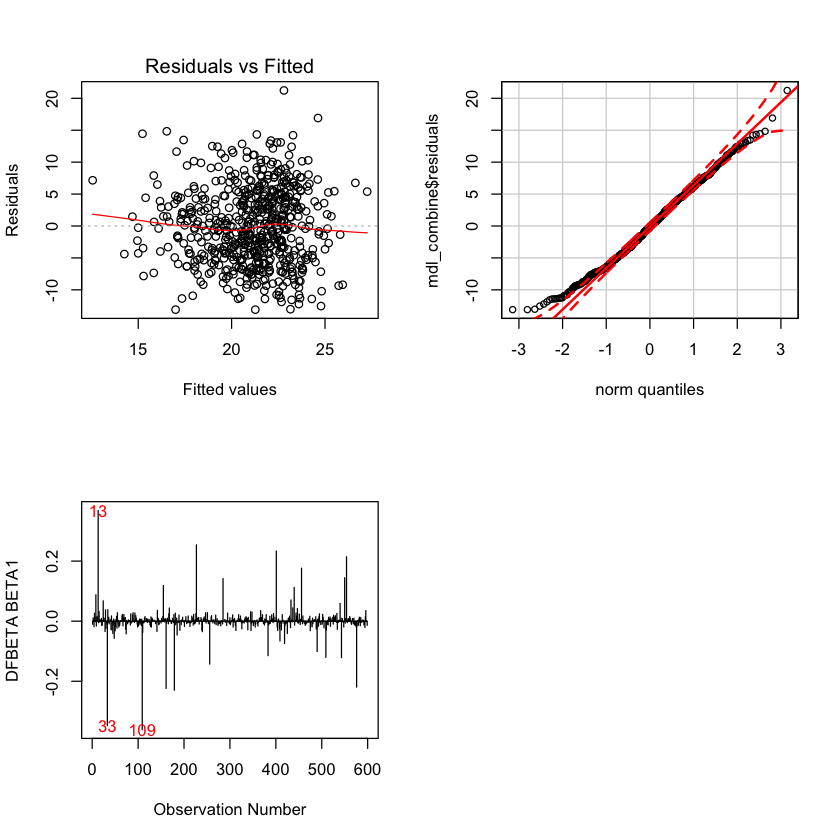

In [49]:
mdl_combine = lm(alpha_pd ~ AMPHIT_15SD +  PQBADSLP + SLEEPHRS + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + M1ADEPR)
par(mfrow=c(2,2))
plot(mdl_combine, 1, id.n=0)
qqPlot(mdl_combine$residuals)

# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(mdl_combine)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [51]:
cor.test(as.numeric(AMPHIT), as.numeric(PQBADSLP))


	Pearson's product-moment correlation

data:  as.numeric(AMPHIT) and as.numeric(PQBADSLP)
t = 0.30208, df = 416, p-value = 0.7627
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.08122158  0.11056690
sample estimates:
       cor 
0.01480887 


In [54]:
summary(data[, c('AMPHIT_15SD', 'PQBADSLP', 'SLEEPHRS', 'BMI', 'GIERACE', 'SITE', 'GIMSTAT', 'MHDIAB', 'M1ADEPR')])

                AMPHIT_15SD    PQBADSLP                    SLEEPHRS  
 0.0                  :371   0: No :359   1: <=6 HRS           :153  
 -1.0                 : 28   1: Yes:240   2: 7 HRS             :143  
 1.0                  : 19                3:>=8 HRS            :128  
 Missing:not collected:181                Missing:not collected:175  
                                                                     
                                                                     
      BMI                      GIERACE             SITE    
 Min.   :17.60   1:WHITE           :520   San Diego  :134  
 1st Qu.:24.51   2:AFRICAN AMERICAN: 24   Birmingham : 75  
 Median :26.72   3:ASIAN           : 34   Minneapolis: 91  
 Mean   :27.01   4:HISPANIC        : 12   Palo Alto  : 86  
 3rd Qu.:28.98   5:OTHER           :  9   Pittsburgh : 92  
 Max.   :42.93                            Portland   :121  
                     GIMSTAT       MHDIAB      M1ADEPR   
 1: Married              :428   

In [87]:
pdf('../figures/MLRplot.pdf')
BMI.sort = sort(data$BMI)
plot(BMI, alpha_pd, col='darkblue', xlab='BMI', ylab='PD Alpha Diversity')
pred.0 = predict(mdl_combine, newdata=data.frame(PQBADSLP='0: No', AMPHIT_15SD='0.0', 
                                               SLEEPHRS='2: 7 HRS', BMI=sort(data$BMI),
                                               GIERACE='1:WHITE', SITE='San Diego', 
                                               GIMSTAT='1: Married', MHDIAB='0: No', 
                                               M1ADEPR='0: No'), type='response', se.fit=T)
pred.1 = predict(mdl_combine, newdata=data.frame(PQBADSLP='1: Yes', AMPHIT_15SD='0.0', 
                                               SLEEPHRS='2: 7 HRS', BMI=sort(data$BMI),
                                               GIERACE='1:WHITE', SITE='San Diego', 
                                               GIMSTAT='1: Married', MHDIAB='0: No', 
                                               M1ADEPR='0: No'), type='response', se.fit=T)
lines(BMI.sort, pred.0$fit, col='green', lwd=3)
# lines(BMI.sort, pred.0$fit - 1.96*pred.0$se.fit, col='green', lty=2, lwd=2)
# lines(BMI.sort, pred.0$fit + 1.96*pred.0$se.fit, col='green', lty=2, lwd=2)

lines(BMI.sort, pred.1$fit, col='orange', lwd=3)
# lines(BMI.sort, pred.1$fit - 1.96*pred.1$se.fit, col='orange', lty=2, lwd=2)
# lines(BMI.sort, pred.1$fit + 1.96*pred.1$se.fit, col='orange', lty=2, lwd=2)

legend(37, 38, c('No', 'Yes'), title='Poor Sleep',
       col=c('green', 'orange'), lty=c('solid', 'solid'), lwd=c(3,3),  bty='n')
dev.off()

pdf 
  2

## AMAMPT (not significant)

In [25]:
fit_mpt_cts = lm(alpha_pd ~ AMAMPT + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR)
fit_mpt_cat = lm(alpha_pd ~ AMAMPT_C1 + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR)

In [26]:
Anova(fit_mpt_cts)

,Sum Sq,Df,F value,Pr(>F)
AMAMPT,6.652119,1,0.1714964,0.679008366
BMI,221.094691,1,5.6999812,0.017430969
GIERACE,401.343865,4,2.5867338,0.036568615
SITE,209.017983,5,1.0777270,0.372117765
GIMSTAT,61.706189,3,0.5302767,0.661738625
MHDIAB,349.294804,1,9.0050729,0.002861796
PQPSQUAL,227.216628,3,1.9526030,0.120577469
M1ADEPR,284.397073,1,7.3319624,0.007065907
Residuals,15437.890827,398,NA,NA


In [27]:
Anova(fit_mpt_cat)

,Sum Sq,Df,F value,Pr(>F)
AMAMPT_C1,1.714181,2,0.02284745,0.9774124595
BMI,212.711137,1,5.67023915,0.0175779331
GIERACE,558.703359,4,3.72333780,0.0052950924
SITE,384.127418,5,2.04793633,0.0703908813
GIMSTAT,180.906823,3,1.60747726,0.1865211712
MHDIAB,499.667508,1,13.31963295,0.0002864296
PQPSQUAL,196.252033,3,1.74382965,0.1568850478
M1ADEPR,336.229564,1,8.96286892,0.0028730168
Residuals,21682.866248,578,NA,NA


## AMPHIT

In [28]:
fit_hit_cts = lm(alpha_pd ~ AMPHIT + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR)
fit_hit_cat = lm(alpha_pd ~ AMPHIT_15SD + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR)

In [29]:
Anova(fit_hit_cts)

,Sum Sq,Df,F value,Pr(>F)
AMPHIT,8.209066e-01,1,0.02115558,0.884429567
BMI,2.319404e+02,1,5.97733447,0.014923690
GIERACE,4.029825e+02,4,2.59631467,0.036000141
SITE,1.983045e+02,5,1.02210084,0.404149971
GIMSTAT,6.194676e+01,3,0.53214310,0.660470762
MHDIAB,3.565173e+02,1,9.18780413,0.002595564
PQPSQUAL,2.247667e+02,3,1.93082019,0.124000556
M1ADEPR,2.760797e+02,1,7.11484732,0.007956851
Residuals,1.544372e+04,398,NA,NA


In [30]:
Anova(fit_hit_cat)

,Sum Sq,Df,F value,Pr(>F)
AMPHIT_15SD,128.9699,3,1.150754,0.3279718595
BMI,183.7307,1,4.918100,0.0269654908
GIERACE,595.7707,4,3.986893,0.0033611781
SITE,366.6477,5,1.962883,0.0824170093
GIMSTAT,181.0648,3,1.615579,0.1846245857
MHDIAB,451.1122,1,12.075359,0.0005492953
PQPSQUAL,176.9255,3,1.578646,0.1934300798
M1ADEPR,319.6934,1,8.557543,0.0035762310
Residuals,21555.6106,577,NA,NA


### AMFVT

In [31]:
fit_fvt_cts = lm(alpha_pd ~ AMFVT + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR)
fit_fvt_cat = lm(alpha_pd ~ AMFVT_C1 + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR)

In [32]:
Anova(fit_fvt_cts)

,Sum Sq,Df,F value,Pr(>F)
AMFVT,36.61289,1,0.9457422,0.331396103
BMI,208.69943,1,5.3908847,0.020746219
GIERACE,420.77167,4,2.7172229,0.029522360
SITE,214.81746,5,1.1097837,0.354525149
GIMSTAT,63.88632,3,0.5500794,0.648355287
MHDIAB,310.36515,1,8.0169972,0.004869245
PQPSQUAL,233.62608,3,2.0115871,0.111757538
M1ADEPR,275.82018,1,7.1246709,0.007914149
Residuals,15407.93006,398,NA,NA


In [33]:
Anova(fit_fvt_cat)

,Sum Sq,Df,F value,Pr(>F)
AMFVT_C1,48.3070,2,0.6452462,0.5249108076
BMI,207.7244,1,5.5492312,0.0188218676
GIERACE,578.2707,4,3.8620381,0.0041697907
SITE,396.7437,5,2.1197536,0.0615385655
GIMSTAT,178.0109,3,1.5851516,0.1918487852
MHDIAB,443.4275,1,11.8458983,0.0006196431
PQPSQUAL,203.5908,3,1.8129356,0.1436229365
M1ADEPR,318.1388,1,8.4988851,0.0036913700
Residuals,21636.2734,578,NA,NA


### PQBADSLP (only one significant)

In [34]:
fit_slp_cts = lm(alpha_pd ~ PQPSQI + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR)
fit_slp_cat = lm(alpha_pd ~ PQBADSLP + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR)

In [35]:
Anova(fit_slp_cts)

,Sum Sq,Df,F value,Pr(>F)
PQPSQI,42.40113,1,1.134371,0.2872888929
BMI,208.45997,1,5.576995,0.0185280525
GIERACE,551.03052,4,3.685473,0.0056504976
SITE,369.01923,5,1.974497,0.0806632810
GIMSTAT,191.68682,3,1.709419,0.1639115492
MHDIAB,485.30488,1,12.983513,0.0003412846
PQPSQUAL,154.74690,3,1.379997,0.2478857717
M1ADEPR,310.61946,1,8.310100,0.0040888841
Residuals,21642.17929,579,NA,NA


In [36]:
Anova(fit_slp_cat)

,Sum Sq,Df,F value,Pr(>F)
PQBADSLP,120.1773,1,3.226737,0.0729660885
BMI,207.5712,1,5.573247,0.0185673606
GIERACE,530.1556,4,3.558643,0.0070236387
SITE,362.3625,5,1.945872,0.0850343855
GIMSTAT,192.9504,3,1.726894,0.1603057953
MHDIAB,471.9534,1,12.671856,0.0004016762
PQPSQUAL,150.4604,3,1.346610,0.2583202498
M1ADEPR,290.4167,1,7.797632,0.0054043317
Residuals,21564.4031,579,NA,NA


In [38]:
# drop PQPSQUAL
fit_slp_cat = lm(alpha_pd ~ PQBADSLP + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + M1ADEPR)
summary(fit_slp_cat)


Call:
lm(formula = alpha_pd ~ PQBADSLP + BMI + GIERACE + SITE + GIMSTAT + 
    MHDIAB + M1ADEPR)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2853  -4.6489  -0.2802   4.4065  21.6536 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     26.01821    1.91741  13.569  < 2e-16 ***
PQBADSLP1: Yes                  -1.10266    0.52296  -2.109 0.035413 *  
BMI                             -0.15291    0.06819  -2.242 0.025325 *  
GIERACE2:AFRICAN AMERICAN       -1.24919    1.30400  -0.958 0.338477    
GIERACE3:ASIAN                  -4.30859    1.16956  -3.684 0.000251 ***
GIERACE4:HISPANIC               -1.41337    1.83754  -0.769 0.442108    
GIERACE5:OTHER                  -1.34744    2.09106  -0.644 0.519582    
SITEBirmingham                   0.32427    0.89683   0.362 0.717806    
SITEMinneapolis                  1.80790    0.84772   2.133 0.033372 *  
SITEPalo Alto                    0.15116    0.88613  

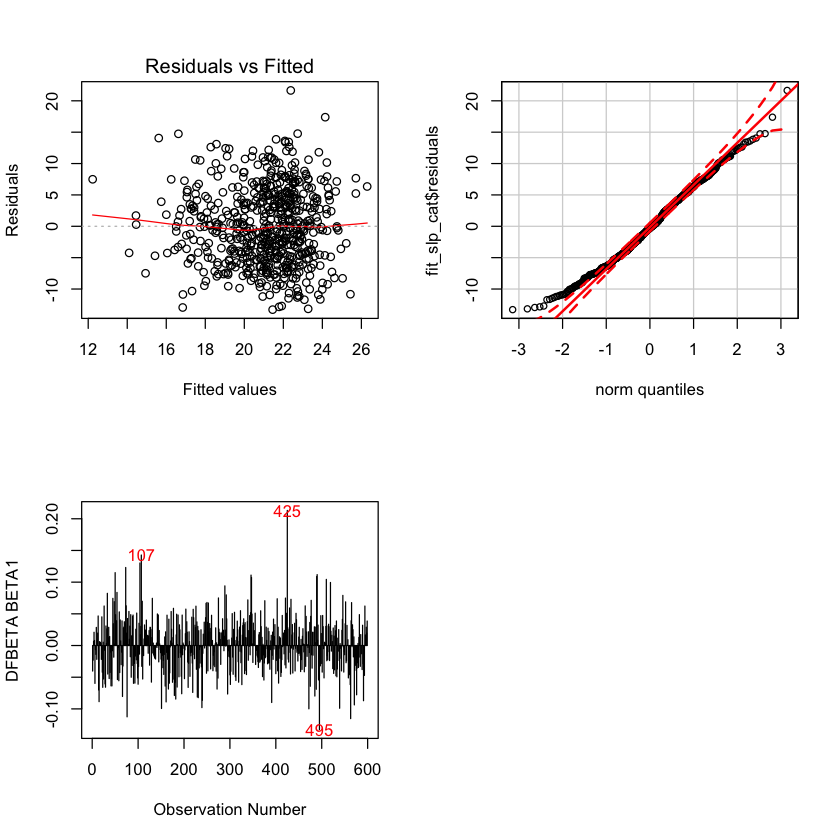

In [39]:
par(mfrow=c(2,2))

# residual scatterplot
plot(fit_slp_cat, 1, id.n = 0)
qqPlot(fit_slp_cat$residuals)

# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(fit_slp_cat)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [40]:
fit_slp_cat_outlier = lm(alpha_pd[-show.points] ~ PQBADSLP[-show.points] + GIERACE[-show.points] + 
SITE[-show.points] + BMI[-show.points] + GIMSTAT[-show.points] + MHDIAB[-show.points] + M1ADEPR[-show.points])
summary(fit_slp_cat_outlier)


Call:
lm(formula = alpha_pd[-show.points] ~ PQBADSLP[-show.points] + 
    GIERACE[-show.points] + SITE[-show.points] + BMI[-show.points] + 
    GIMSTAT[-show.points] + MHDIAB[-show.points] + M1ADEPR[-show.points])

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0838  -4.5097  -0.2741   4.3998  17.5457 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                   25.78546    1.89318  13.620
PQBADSLP[-show.points]1: Yes                  -1.21895    0.51687  -2.358
GIERACE[-show.points]2:AFRICAN AMERICAN       -1.79654    1.30791  -1.374
GIERACE[-show.points]3:ASIAN                  -4.30047    1.15006  -3.739
GIERACE[-show.points]4:HISPANIC               -1.45773    1.80625  -0.807
GIERACE[-show.points]5:OTHER                  -1.46452    2.05559  -0.712
SITE[-show.points]Birmingham                   0.26721    0.88303   0.303
SITE[-show.points]Minneapolis                  1.53761    0.83685   1.837


### SLEEPHRS

In [41]:
fit_hrs_cts = lm(alpha_pd ~ SLEEPHRS + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR)
fit_hrs_cat = lm(alpha_pd ~ SLSLPHRS + BMI + GIERACE + SITE + GIMSTAT + MHDIAB + PQPSQUAL + M1ADEPR)

In [42]:
Anova(fit_hrs_cts)

,Sum Sq,Df,F value,Pr(>F)
SLEEPHRS,175.6776,3,1.570915,0.1953223164
BMI,237.4275,1,6.369254,0.0118787629
GIERACE,572.4698,4,3.839283,0.0043372766
SITE,365.8888,5,1.963074,0.0823880170
GIMSTAT,192.5878,3,1.722126,0.1612863943
MHDIAB,528.7770,1,14.185024,0.0001826791
PQPSQUAL,188.1220,3,1.682193,0.1696869635
M1ADEPR,339.5369,1,9.108450,0.0026565890
Residuals,21508.9028,577,NA,NA


In [43]:
Anova(fit_hrs_cat)

,Sum Sq,Df,F value,Pr(>F)
SLSLPHRS,15.59872,1,0.4112123,0.521718424
BMI,169.71841,1,4.4741035,0.035023844
GIERACE,565.13708,4,3.7245248,0.005446447
SITE,263.77064,5,1.3907002,0.226668771
GIMSTAT,221.21747,3,1.9439058,0.121905899
MHDIAB,352.03269,1,9.2802581,0.002468295
PQPSQUAL,101.57952,3,0.8926104,0.444956271
M1ADEPR,211.62917,1,5.5789516,0.018651097
Residuals,15325.13488,404,NA,NA
